## Task 2: Prediction using Supervised ML
### By: Syed Nadeem Haque
#### Problem Statement
● From the given ‘Iris’ dataset, predict the optimum number of  clusters and represent it visually. 

In [1]:
# Importing all libraries required
# supress Warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Reading data from remote link
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


##### Data imported successfully

### Data Cleaning

In [3]:
# inspecting the Dataframe
print(df.shape)
print(df.columns)
print(df.info())
print(df.describe())

(150, 6)
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB
None
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000  

##### ``1 There are total 150 rows and 4 columns in the dataset.
##### ``2 The column names are "sepal length", "sepal width", "petal length" & "petal width".
##### ``3 All the four columns are float datatype.
##### ``4 Sepal length min 4.3, max 7.9, Sepal width min 2, max 4.4, Petal length min 1, max 6.9 and Petal width min 0.1, max 2.5.

In [4]:
# finding the sum of Null values in the Dataframe
print (df.isnull().sum())  
print (df.isnull().values.any())
print (df.isnull().values.sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
False
0


##### There are no missing values in the dataset

### EDA

In [5]:
# "Id" column is not required for clustering
df.drop(columns="Id",inplace=True)

##### 'Id' column dropped 

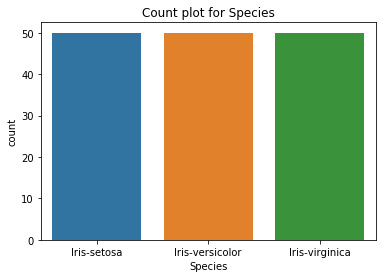

In [6]:
# plotting the count plot of "Species"
sns.countplot(x="Species", data=df)
plt.title("Count plot for Species")
plt.show()

##### There are total three Species namely "Iris-setosa", "Iris-versicolor" & "Iris-virginica"

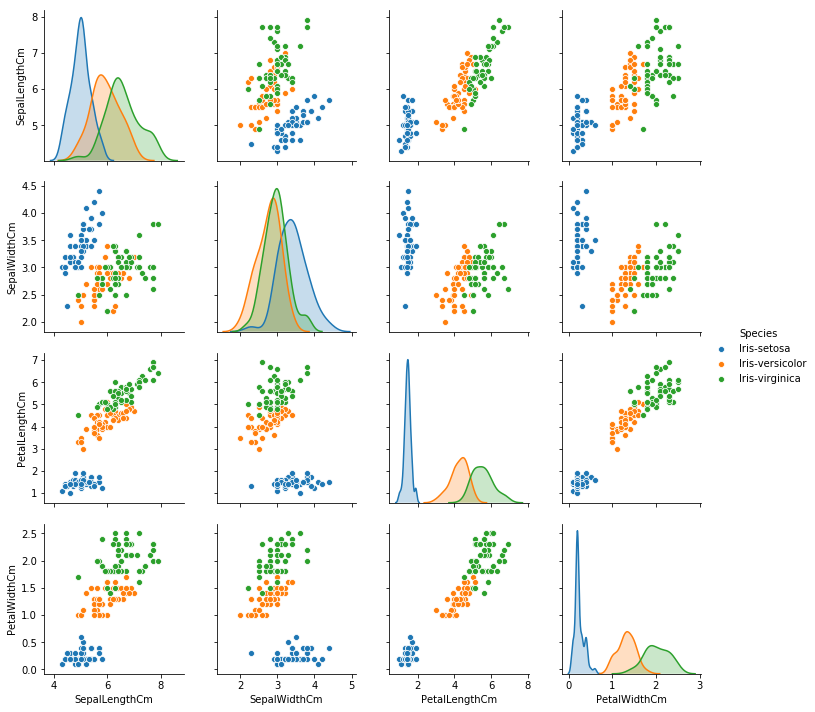

In [7]:
# Pair plot for pairwise relation
sns.pairplot(data=df, hue='Species')

##### The pairplot graph gives us the pair wair relationship, from the above graph we can see that "Iris-setosa" species differ from the other two species in terms of relationship.

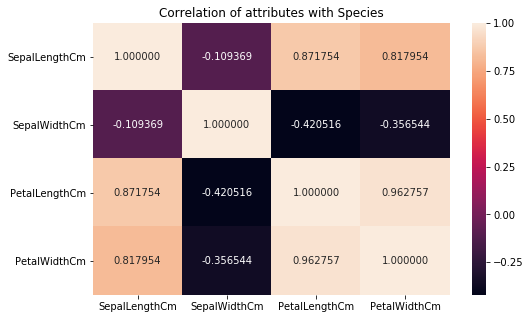

In [8]:
# Correlation among the attributes plotting using a HeatMap
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(),annot=True,fmt="f").set_title("Correlation of attributes with Species")
plt.show()

##### The 'PetalWidth' and 'PetalLength' are correlated with each other and 'SepalWidth' and 'SepalLength' are not correlated as shown in the heatmap.

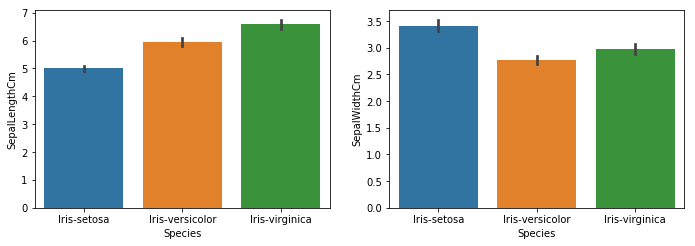

In [9]:
# Bar plot for Sepal Length and Sepal Width
plt.figure(figsize=(18, 8))
plt.subplot(2,3,1)
sns.barplot(x="Species", y="SepalLengthCm", data=df)
plt.subplot(2,3,2)
sns.barplot(x="Species", y="SepalWidthCm", data=df)
plt.show()

##### For the Sepal length "Iris-virginica" are high while for Sepal width "Iris-setosa" are high on number.

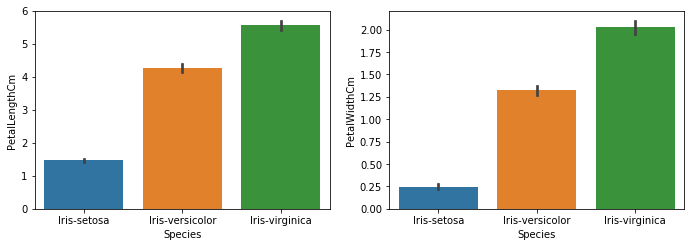

In [10]:
# Bar plot for Petal Length and Petal Width
plt.figure(figsize=(18, 8))
plt.subplot(2,3,1)
sns.barplot(x="Species", y="PetalLengthCm", data=df)
plt.subplot(2,3,2)
sns.barplot(x="Species", y="PetalWidthCm", data=df)

##### For both Petal length and Petal width "Iris-virginica" have got the highest number with "Iris-setosa" seems to the lowest on both.

### Clustering

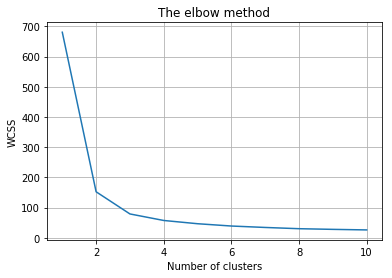

In [11]:
# Finding the optimum number of clusters for k-means classification

x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.grid()
plt.show()

#####  From the above graph, the optimum clusters is where the elbow occurs. This is when within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. From this we choose the number of clusters as '3'.

In [12]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

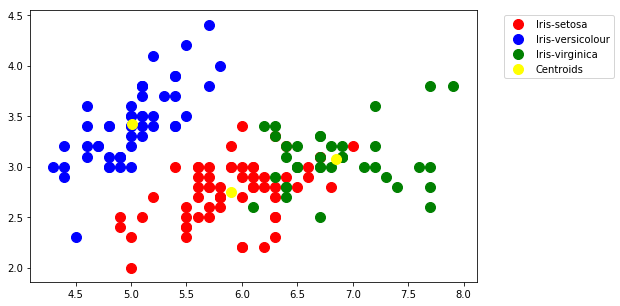

In [13]:
# Visualising the clusters
plt.figure(figsize=(8, 5))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#### Conclusion
##### `` 1. Optimum number cluster that is formed are 3 as shown in the elbow graph.
##### `` 2. Visually plotted the formed cluster along with the centroid and label Species.

### Thank You